In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [12]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.shape

(891, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# observation 
1. 80% of cabin data is missing, need to drop the colunm
2. In age there is minimum age shows is 0.42 need to transform, also need to convert into intger
3. Passenger ID dosent contribute much into dataset here so need to dorp

In [34]:
df.drop(columns=["Cabin","PassengerId"],inplace=True)

In [36]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

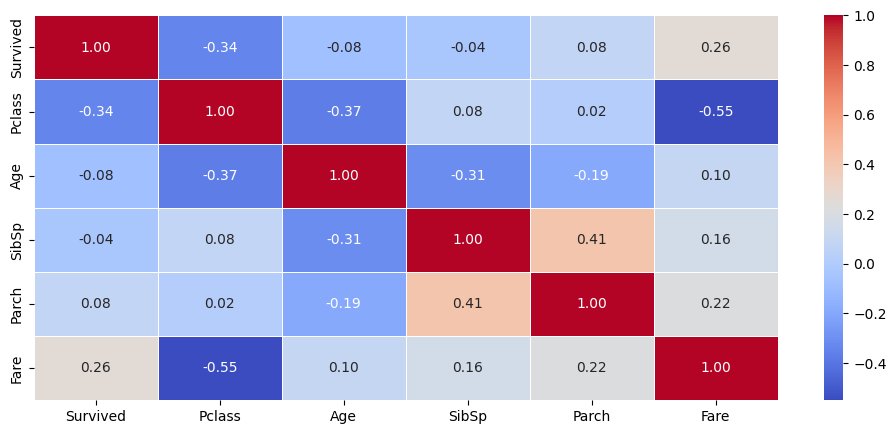

In [44]:
plt.figure(figsize=(12,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

# observation 
- Age is little depandent on PClass and SibSp so, we can fill the null values through group

In [47]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [49]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [59]:
age = df.groupby(["Pclass","SibSp"])["Age"].mean().reset_index()
df_age = df[pd.isna(df["Age"])]

In [61]:
def fillna_age(row):
    if pd.isnull(row["Age"]):
        group_mean = age[(age["Pclass"] == row["Pclass"]) & (age["SibSp"] == row["SibSp"])]["Age"].values
        if len(group_mean) > 0:
            return group_mean[0]
        else:
            return df["Age"].mean() 
    else:
        return row["Age"]
df["Age"] = df.apply(fillna_age, axis=1)

In [63]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         7
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [67]:
df['Age']= df['Age'].fillna(df['Age'].mean())

In [73]:
df['Age']=df['Age'].astype("int")

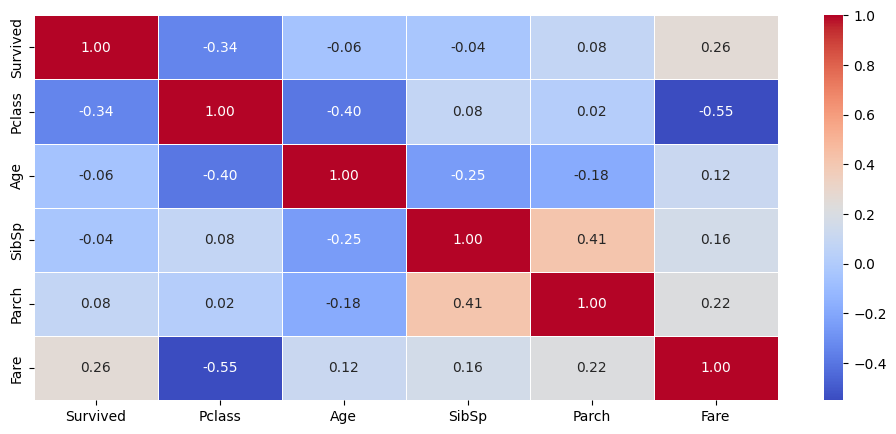

In [75]:
plt.figure(figsize=(12,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()